<a href="https://colab.research.google.com/github/janel-dsbc/Deep-Dive-Projects/blob/main/Final_Copy_Ahle_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Housing Price Prediction


The project should be done using Regression prediction techniques ( with feature scaling and regularization ) as covered in class.
The goal is to minimize the RMS ***percentage*** error ( root mean squared percentage error - RMSPE ) on our prediction of the house sales price.



A data dictionary file is available at AWS S3 at [Housing Data Dictionary]( https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Housing%20-%20Data%20Documentation.pdf ).

The data is available on AWS S3 at https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv .


Regression assumptions:  linear relationship, independent residuals, constant variance of residuals, no collinearity, residuals are normally distributed.

#Problem Definition
The goal is to minimize the RMS percentage error ( root mean squared percentage error - RMSPE ) on the prediction of the house sales price.

#Data Overview
SIZE: 2930 observations, 82 variables

DESCRIPTIVE ABSTRACT: Data set contains information from the
Assessor's Office used in computing assessed values for individual
residential properties sold from 2006 to 2010.

VARIABLE DESCRIPTIONS:
Tab characters are used to separate variables in the data file. The
data has 82 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation
identifiers).

##Data Collection


In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

##File Path
File paths for train test data

In [2]:
url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv'
#base_path = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/'
#train_path = base_path + 'Housing.Data.csv'
#test_path = base_path + 'Housing.Data.csv'

##Load Data

In [3]:
housing = pd.read_csv(url)
housing.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000


In [4]:
housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PID,2637.0,7.141301e+08,1.887527e+08,526301100.0,5.284770e+08,535453040.0,9.071870e+08,1.007100e+09
MS SubClass,2637.0,5.734926e+01,4.249909e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2188.0,6.916682e+01,2.335678e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2637.0,1.004469e+04,6.742550e+03,1300.0,7.436000e+03,9450.0,1.152600e+04,1.646600e+05
Overall Qual,2637.0,6.097459e+00,1.411522e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2637.0,5.569966e+00,1.118262e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2637.0,1.971289e+03,3.030699e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2637.0,1.984203e+03,2.091308e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2614.0,1.018879e+02,1.795782e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03
BsmtFin SF 1,2636.0,4.384412e+02,4.496023e+02,0.0,0.000000e+00,368.0,7.320000e+02,5.644000e+03


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

In [6]:
housing.shape

(2637, 81)

##Data Cleaning

I'll start by making a copy of the dataframe before I clean the data.

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
pd.get_option('display.max_columns')

In [9]:
pd.set_option('display.max_rows', None)

In [10]:
housing.isnull().sum();

Create a copy of data before running tests.

In [11]:
train = housing.copy()

In [12]:
train = train.select_dtypes(include =['float', 'int'])
train.head()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,905101070,20,62.0,14299,4,3,1964,1964,0.0,513.0,144.0,348.0,1005.0,1005,0,0,1005,1.0,0.0,1,0,3,1,5,0,1964.0,2.0,440.0,0,0,0,0,0,0,0,7,2007,115400
1,905101330,90,72.0,10791,4,5,1967,1967,0.0,0.0,0.0,0.0,0.0,1296,0,0,1296,0.0,0.0,2,0,2,2,6,0,1967.0,2.0,516.0,0,0,0,0,0,0,500,10,2006,90000
2,903454090,50,50.0,9000,6,6,1937,1950,0.0,0.0,0.0,780.0,780.0,780,595,0,1375,0.0,0.0,1,1,3,1,6,1,1979.0,1.0,544.0,0,162,0,0,126,0,0,12,2007,141000
3,533244030,60,68.0,7379,8,5,2000,2000,0.0,484.0,0.0,491.0,975.0,975,873,0,1848,1.0,0.0,2,1,3,1,7,1,2000.0,2.0,592.0,280,184,0,0,0,0,0,4,2010,254000
4,909252020,70,60.0,7200,7,9,1936,2007,0.0,350.0,210.0,0.0,560.0,575,560,0,1135,1.0,0.0,1,0,3,1,6,0,1971.0,2.0,576.0,256,0,0,0,0,0,0,4,2009,155000


In [13]:
nulls = train.isnull().sum()
nulls

PID                  0
MS SubClass          0
Lot Frontage       449
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        23
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      147
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
dtype: int64

In [14]:
len(train['Garage Area'])

2637

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   Lot Frontage     2188 non-null   float64
 3   Lot Area         2637 non-null   int64  
 4   Overall Qual     2637 non-null   int64  
 5   Overall Cond     2637 non-null   int64  
 6   Year Built       2637 non-null   int64  
 7   Year Remod/Add   2637 non-null   int64  
 8   Mas Vnr Area     2614 non-null   float64
 9   BsmtFin SF 1     2636 non-null   float64
 10  BsmtFin SF 2     2636 non-null   float64
 11  Bsmt Unf SF      2636 non-null   float64
 12  Total Bsmt SF    2636 non-null   float64
 13  1st Flr SF       2637 non-null   int64  
 14  2nd Flr SF       2637 non-null   int64  
 15  Low Qual Fin SF  2637 non-null   int64  
 16  Gr Liv Area      2637 non-null   int64  
 17  Bsmt Full Bath

In [16]:
for i in range(37):
  null_percentage = (nulls[i])/(len(train['Garage Area']))
  print(null_percentage*100)

0.0
0.0
17.02692453545696
0.0
0.0
0.0
0.0
0.0
0.8722032612817596
0.037921880925293895
0.037921880925293895
0.037921880925293895
0.037921880925293895
0.0
0.0
0.0
0.0
0.07584376185058779
0.07584376185058779
0.0
0.0
0.0
0.0
0.0
0.0
5.5745164960182025
0.037921880925293895
0.037921880925293895
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


For Lot Frontage, I filled in the nulls by using the mean.  The rest of the nulls in my train dataset, I removed the rows.

In [17]:
train['Lot Frontage'] = train['Lot Frontage'].fillna(train['Lot Frontage'].mean())

In [18]:
train['SalePrice'] = housing['SalePrice']

In [19]:
train = train.dropna()

In [20]:
nulls = train.isnull().sum()
nulls

PID                0
MS SubClass        0
Lot Frontage       0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
SalePrice          0
dtype: int64

In [21]:
train.head()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,905101070,20,62.0,14299,4,3,1964,1964,0.0,513.0,144.0,348.0,1005.0,1005,0,0,1005,1.0,0.0,1,0,3,1,5,0,1964.0,2.0,440.0,0,0,0,0,0,0,0,7,2007,115400
1,905101330,90,72.0,10791,4,5,1967,1967,0.0,0.0,0.0,0.0,0.0,1296,0,0,1296,0.0,0.0,2,0,2,2,6,0,1967.0,2.0,516.0,0,0,0,0,0,0,500,10,2006,90000
2,903454090,50,50.0,9000,6,6,1937,1950,0.0,0.0,0.0,780.0,780.0,780,595,0,1375,0.0,0.0,1,1,3,1,6,1,1979.0,1.0,544.0,0,162,0,0,126,0,0,12,2007,141000
3,533244030,60,68.0,7379,8,5,2000,2000,0.0,484.0,0.0,491.0,975.0,975,873,0,1848,1.0,0.0,2,1,3,1,7,1,2000.0,2.0,592.0,280,184,0,0,0,0,0,4,2010,254000
4,909252020,70,60.0,7200,7,9,1936,2007,0.0,350.0,210.0,0.0,560.0,575,560,0,1135,1.0,0.0,1,0,3,1,6,0,1971.0,2.0,576.0,256,0,0,0,0,0,0,4,2009,155000


I look at the dictionary and remove floats or ints that are not truly floats or integers such as PID, MS Subclass, year build, month sold, etc.

In [22]:
train.drop(columns = ['PID', 'MS SubClass', 'Overall Qual','Overall Cond', 'Year Built', 'Year Remod/Add', 'Low Qual Fin SF', 'Bsmt Full Bath', 'Bsmt Half Bath','Garage Yr Blt','Garage Cars','Mo Sold', 'Yr Sold'], axis = 1, inplace = True)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2466 entries, 0 to 2636
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Frontage    2466 non-null   float64
 1   Lot Area        2466 non-null   int64  
 2   Mas Vnr Area    2466 non-null   float64
 3   BsmtFin SF 1    2466 non-null   float64
 4   BsmtFin SF 2    2466 non-null   float64
 5   Bsmt Unf SF     2466 non-null   float64
 6   Total Bsmt SF   2466 non-null   float64
 7   1st Flr SF      2466 non-null   int64  
 8   2nd Flr SF      2466 non-null   int64  
 9   Gr Liv Area     2466 non-null   int64  
 10  Full Bath       2466 non-null   int64  
 11  Half Bath       2466 non-null   int64  
 12  Bedroom AbvGr   2466 non-null   int64  
 13  Kitchen AbvGr   2466 non-null   int64  
 14  TotRms AbvGrd   2466 non-null   int64  
 15  Fireplaces      2466 non-null   int64  
 16  Garage Area     2466 non-null   float64
 17  Wood Deck SF    2466 non-null   int64 

# Exploratory Data Analysis


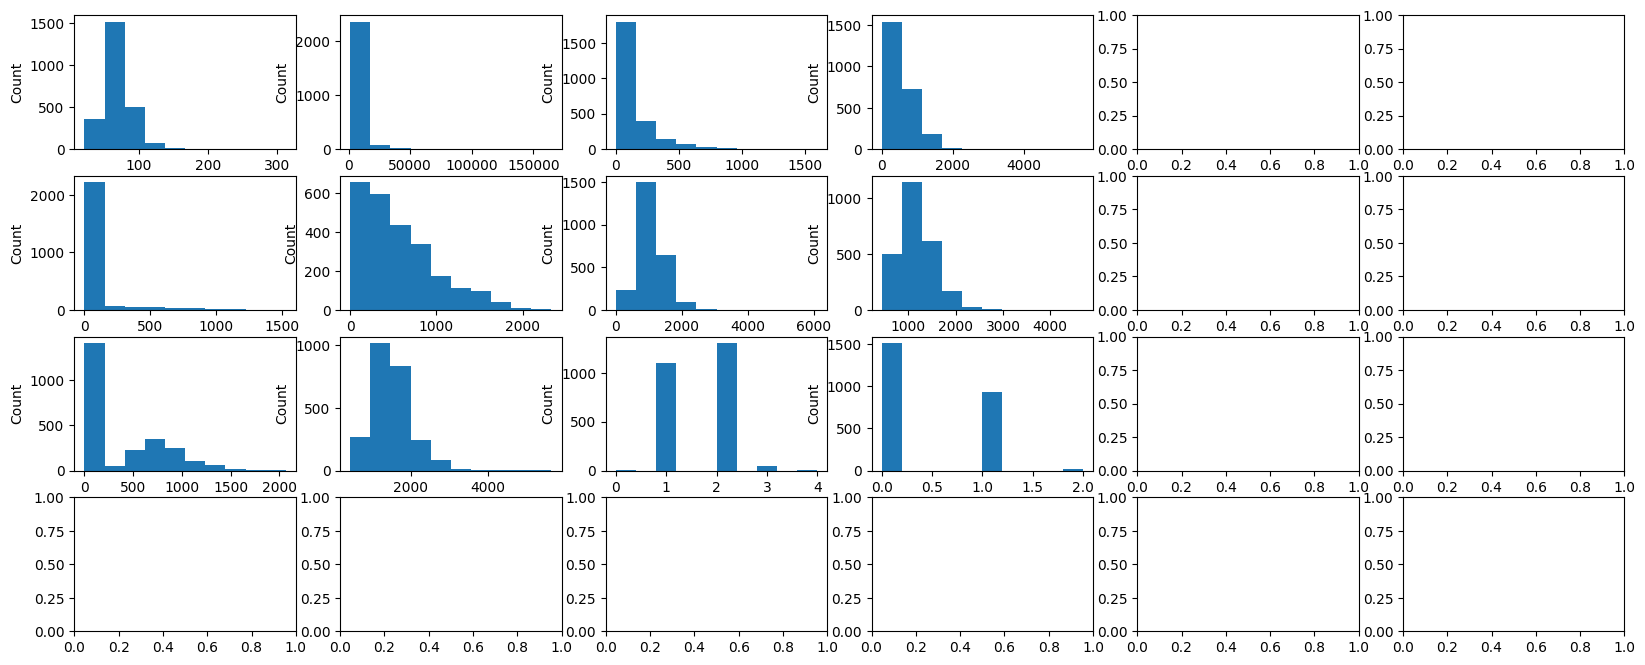

In [24]:
fig, axs = plt.subplots(4,6,figsize = (20,8)) # Creating 2x4 subplots because we have 11 columns in our data
column_names = train.columns
n = 0
for i in range(3): # Loop through rows
  for j in range(4): # Loop through columns
    axs[i,j].hist(train[column_names[n]])
    axs[i,j].set_xlabel(column_names[n])
    axs[i,j].set_ylabel('Count')
    n = n + 1

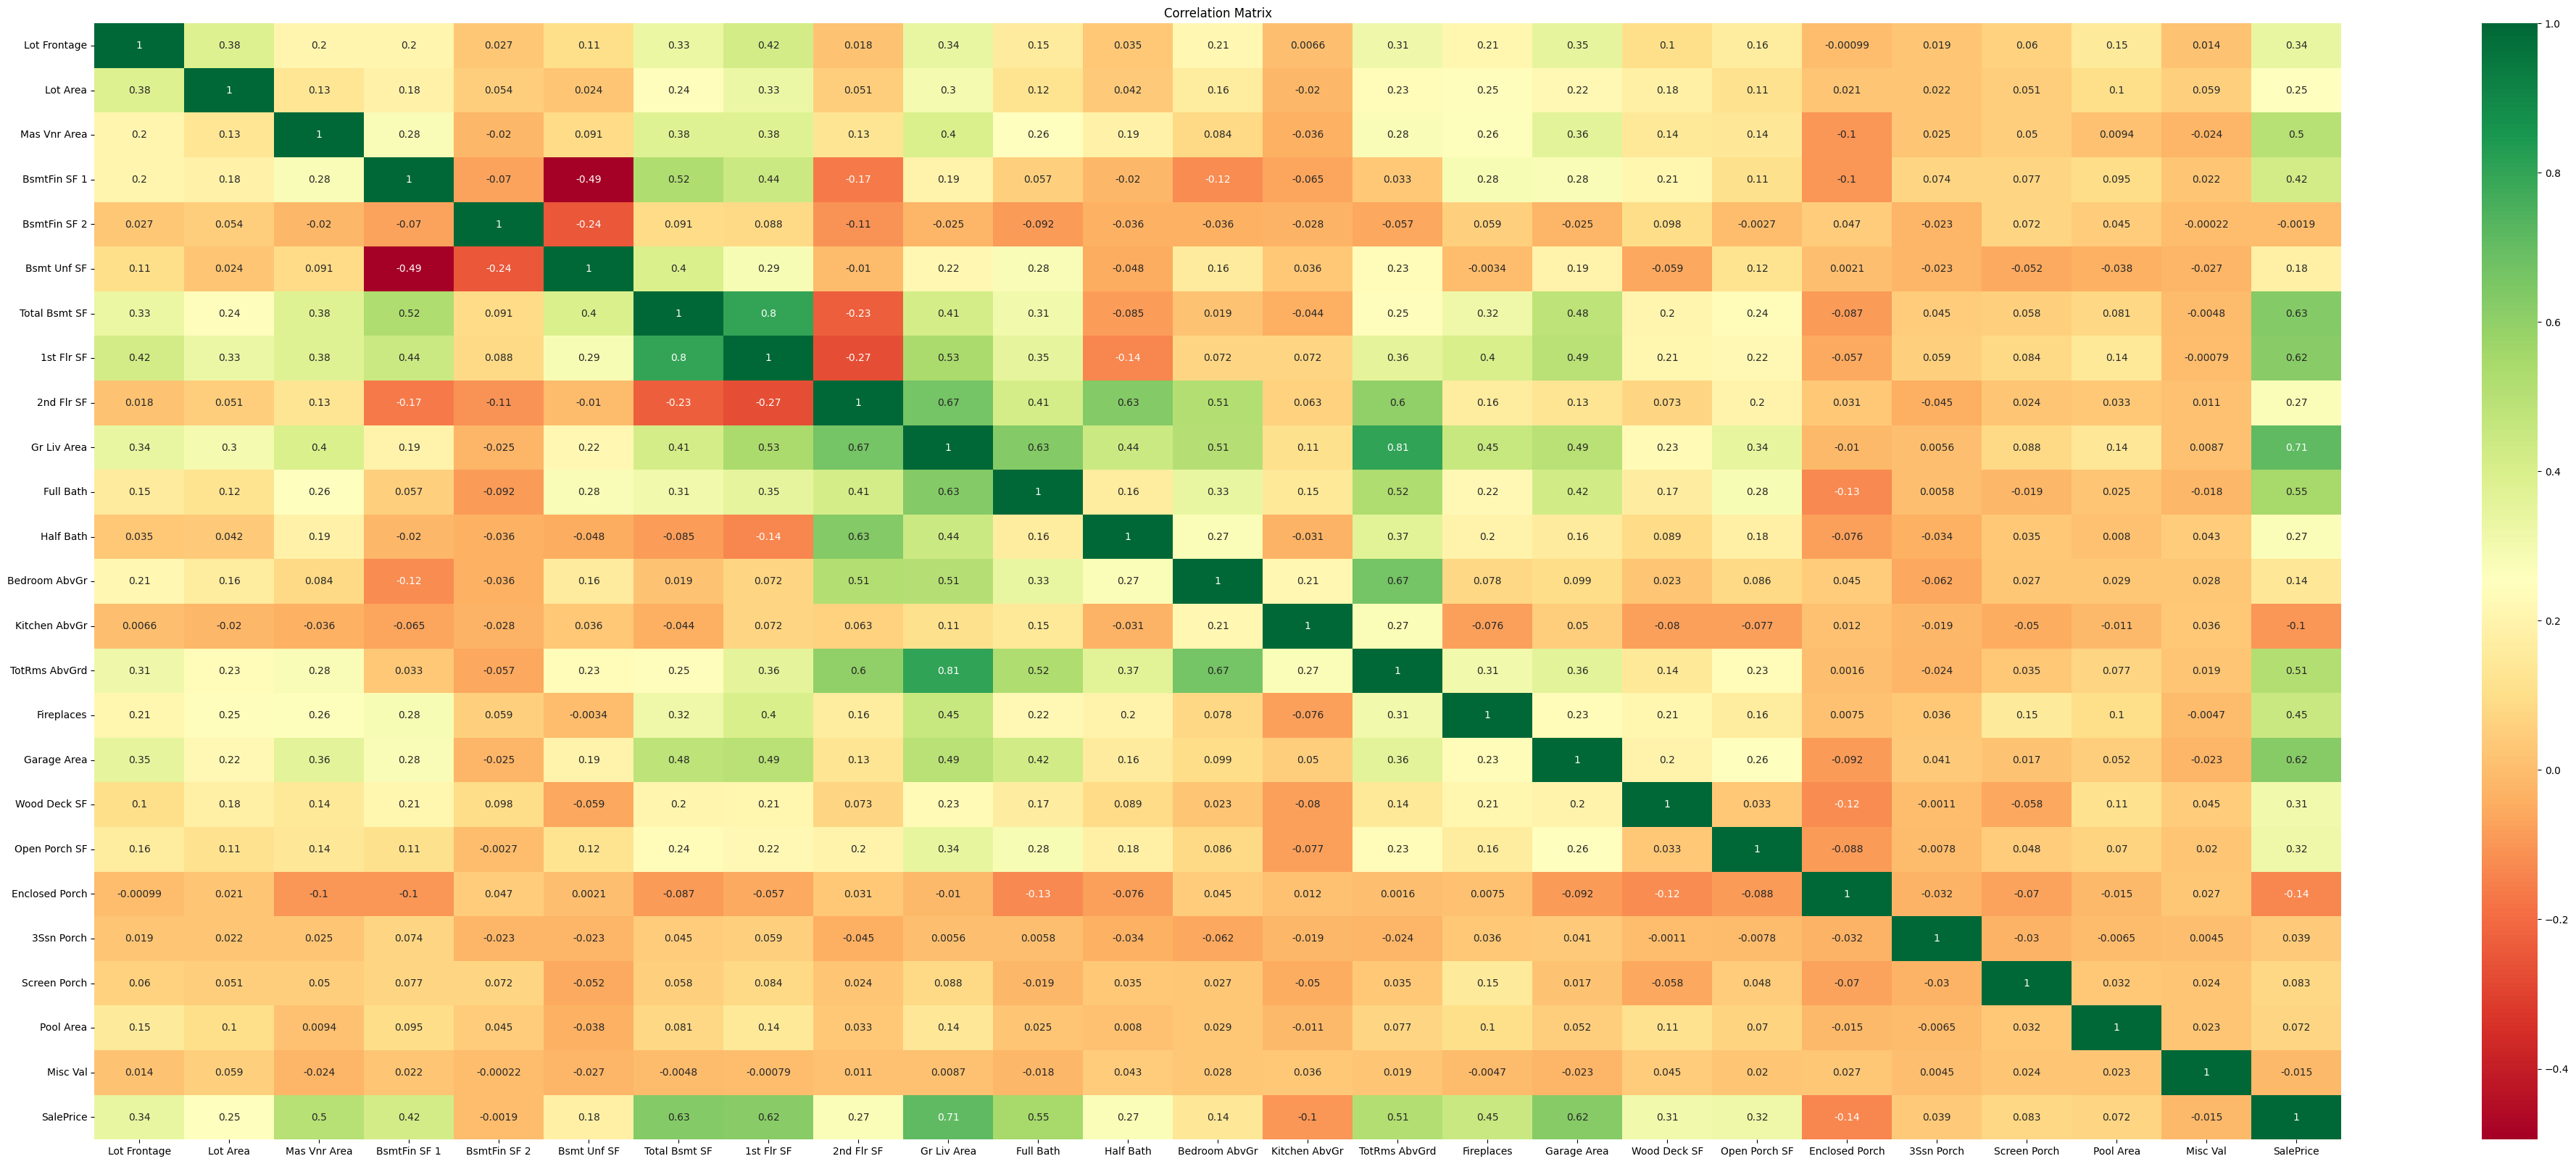

In [25]:
# Correlation Plot
column_correlations = train.corr()
#column_correlations
plt.figure(figsize=(50,20))
plt.title('Correlation Matrix')
sns.heatmap(column_correlations, annot=True, cmap='RdYlGn') ;

In [26]:
corrs = train.corr().round(2).unstack().abs()
corrs = corrs[corrs < 1]
corrs.sort_values(ascending = False)[::2]

Gr Liv Area     TotRms AbvGrd     0.81
Total Bsmt SF   1st Flr SF        0.80
Gr Liv Area     SalePrice         0.71
2nd Flr SF      Gr Liv Area       0.67
TotRms AbvGrd   Bedroom AbvGr     0.67
SalePrice       Total Bsmt SF     0.63
Gr Liv Area     Full Bath         0.63
2nd Flr SF      Half Bath         0.63
Garage Area     SalePrice         0.62
1st Flr SF      SalePrice         0.62
TotRms AbvGrd   2nd Flr SF        0.60
SalePrice       Full Bath         0.55
1st Flr SF      Gr Liv Area       0.53
BsmtFin SF 1    Total Bsmt SF     0.52
Full Bath       TotRms AbvGrd     0.52
TotRms AbvGrd   SalePrice         0.51
Bedroom AbvGr   2nd Flr SF        0.51
                Gr Liv Area       0.51
SalePrice       Mas Vnr Area      0.50
Garage Area     1st Flr SF        0.49
Bsmt Unf SF     BsmtFin SF 1      0.49
Gr Liv Area     Garage Area       0.49
Garage Area     Total Bsmt SF     0.48
Fireplaces      SalePrice         0.45
Gr Liv Area     Fireplaces        0.45
                Half Bath

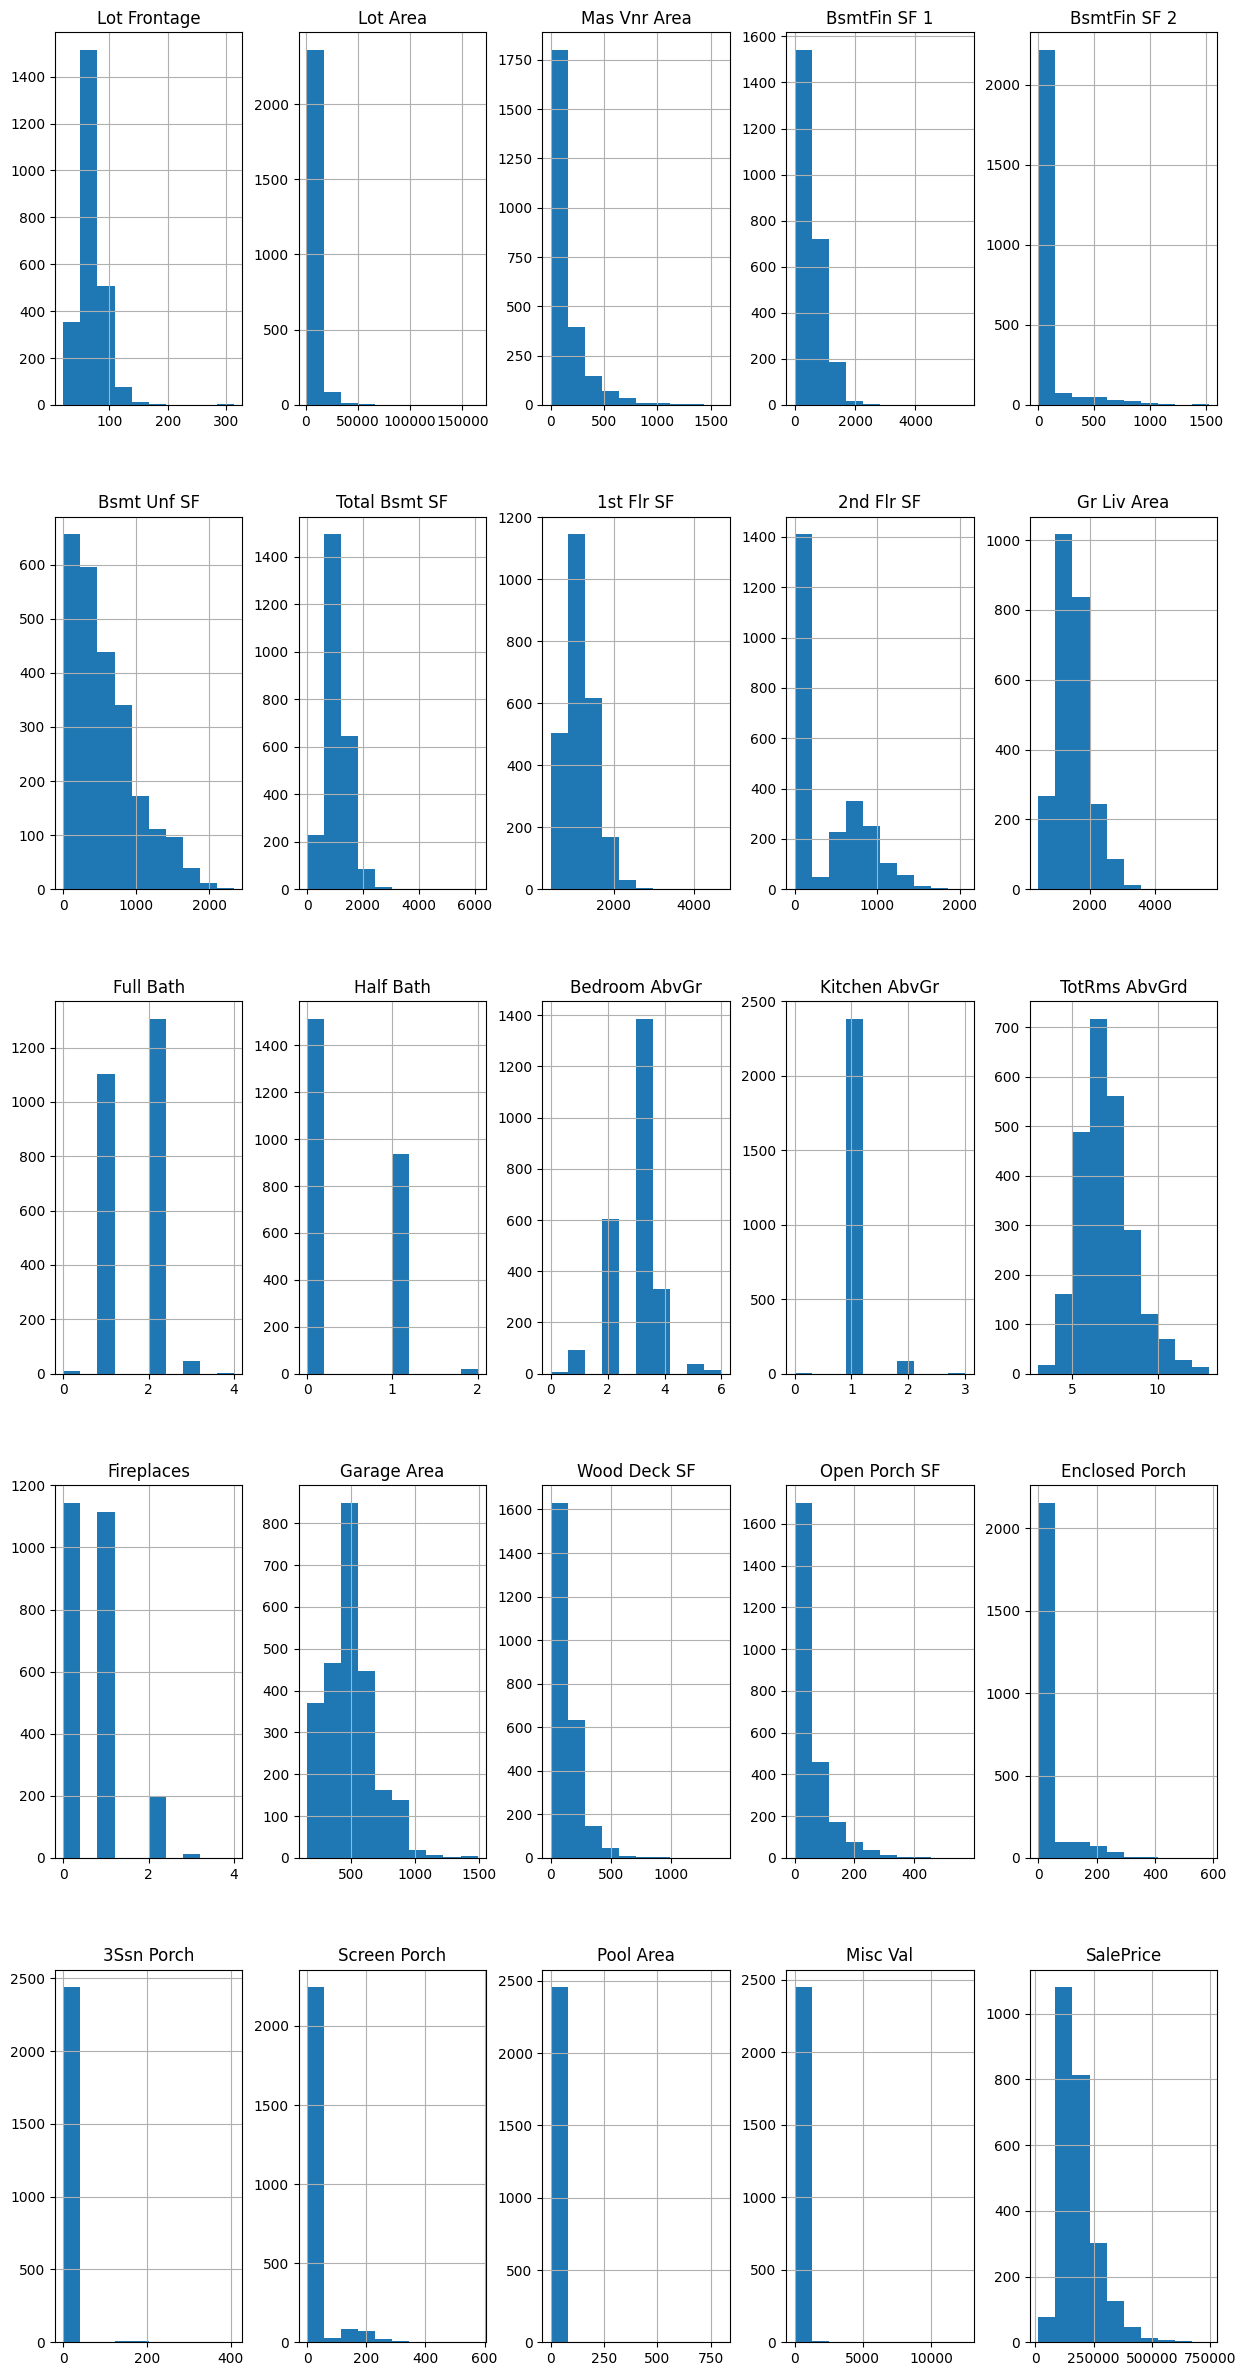

In [27]:
train.hist(figsize = (15,30));

In [28]:
#sns.pairplot(train)

#Data Processing

First, we create a model with all the features and perform cross validation.

In [29]:
# split into Target and Features
X = train.drop('SalePrice', axis = 1)
y = train['SalePrice']

In [30]:
#Perform CV
n = 500
results = np.zeros(n)
for idx in range(n):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  results[idx] = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"CV RMSE: {results.mean().round(2)}")
print(f"Number of Predictors: {len(X.columns)}")

CV RMSE: 39749.56
Number of Predictors: 24


In [31]:
def rmspe(y_true, y_pred):
    return np.sqrt(np.nanmean(np.square(((y_true - y_pred) / y_true))))*100

In [32]:
rmspe(y_test, y_pred)

22.48049589350224

##Filter Methods

In [33]:
# Fit linear regression model w/ just predictors highly correlated with response
corrs = train.corr()['SalePrice'].abs().sort_values(ascending = False)
keep = corrs[(corrs>.2) & (corrs <1)]
keep

Gr Liv Area      0.711810
Total Bsmt SF    0.626794
Garage Area      0.621222
1st Flr SF       0.618610
Full Bath        0.548254
TotRms AbvGrd    0.512184
Mas Vnr Area     0.499478
Fireplaces       0.450985
BsmtFin SF 1     0.419445
Lot Frontage     0.336466
Open Porch SF    0.320764
Wood Deck SF     0.309443
Half Bath        0.273538
2nd Flr SF       0.270170
Lot Area         0.253657
Name: SalePrice, dtype: float64

In [34]:
# First we will break up our data into training and testing sets
X = train[['Gr Liv Area', 'Total Bsmt SF', 'TotRms AbvGrd', 'Full Bath']]
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=4)

In [35]:
# Fit a linear model using statsmodels
myfit = sm.OLS(y_train, X_train).fit()
myfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              7877.
Date:                Thu, 18 Jul 2024   Prob (F-statistic):                        0.00
Time:                        16:39:01   Log-Likelihood:                         -22504.
No. Observations:                1849   AIC:                                  4.502e+04
Df Residuals:                    1845   BIC:                                  4.504e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Gr Liv Area      85.9857      4.081     21.070      0.000      77.982      93.989
Total Bsmt SF    64.1244      2.627     24.409      0.000      58.972      69.277
TotRms AbvGrd -6541.3755    919.147     -7.117      0.000   -8344.052   -4738.699
Full Bath      1.828e+04   2506.063      7.293      0.000    1.34e+04    2.32e+04
==============================================================================
Omnibus:                      820.136   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65274.000
Skew:                          -1.183   Prob(JB):                         0.00
Kurtosis:                      32.011   Cond. No.                     4.45e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
# Perform CV again
n = 500
results = np.zeros(n)
for idx in range(n):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  results[idx] = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"CV RMSE: {results.mean().round(2)}")
print(f"Number of Predictors: {len(X.columns)}")

CV RMSE: 46276.44
Number of Predictors: 4


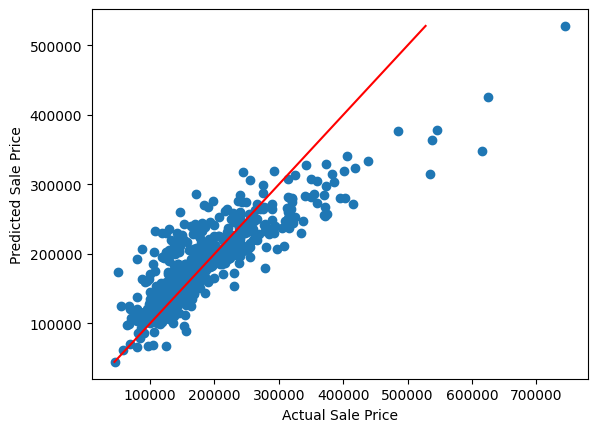

In [37]:
# See how well our model performs on our test data
y_pred = myfit.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([min(y_pred), max(y_pred)],[min(y_pred), max(y_pred)], c='red')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price') ;

In [38]:
list(zip(y_test,y_pred))[:10]

[(71000, 107936.95521170094),
 (123900, 108852.83405234027),
 (85000, 117066.45805005284),
 (135500, 144413.41643970556),
 (76500, 115265.13678058216),
 (625000, 425047.1785046435),
 (290000, 271507.04750823404),
 (128500, 174451.13326464788),
 (170000, 167662.4323705597),
 (140000, 156095.0855552509)]

In [39]:
# Calculate root mean squared error on test data
rmse = mean_squared_error(y_test, y_pred, squared = False)
print(f"RMSE: {rmse}")

RMSE: 43577.63163823747


In [40]:
# Use cross validation to assess model performance
results = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv = 10)
rmse = abs(results.mean())
print(f"CV RMSE: {rmse}")

CV RMSE: 45724.44373153284


In [41]:
def rmspe(y_true, y_pred):
    return np.sqrt(np.nanmean(np.square(((y_true - y_pred) / y_true))))*100


In [42]:
rmspe(y_test, y_pred)

27.02685810207483

In [43]:
# scale the features using the StandardScaler ( Z-score )
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state=4)

In [44]:
# Fit a linear model using Sklearn
model = LinearRegression()
myfit2 = model.fit(X_train, y_train)

( myfit2.intercept_, myfit2.coef_ )

(183304.7935705279,
 array([39816.49971077, 29025.09846761, -5425.0467375 , 11100.31608445]))

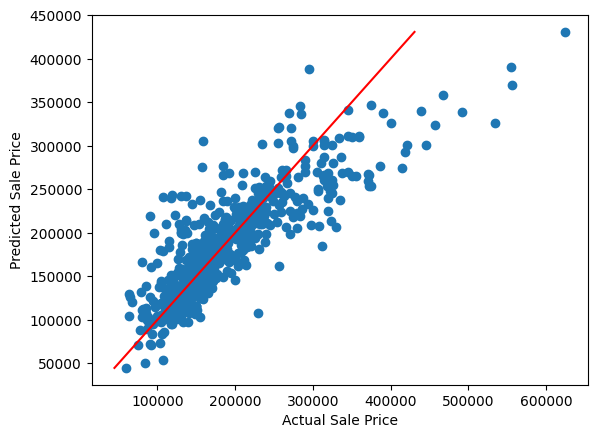

In [45]:
# See how well our model performs on our test data after StandardScaler
y_pred = myfit2.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([min(y_pred), max(y_pred)],[min(y_pred), max(y_pred)], c='red')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price') ;

#Data Visualization and RMSE Results

In [46]:
# scale the features using the StandardScaler ( Z-score )
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state=4)

In [47]:
X_scaled

array([[-1.02856772, -0.12776262, -0.94918963, -1.03724416],
       [-0.43626307, -2.48671855, -0.30043641,  0.79371081],
       [-0.27546558, -0.65588708, -0.30043641, -1.03724416],
       ...,
       [-0.57874185,  0.39097296, -1.59794285, -1.03724416],
       [-0.32635086,  0.01072335,  0.34831681,  0.79371081],
       [ 1.65206881, -0.05265159,  0.99707004,  0.79371081]])

In [48]:
pd.DataFrame(X_scaled).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,2466.0,-1.815255e-16,1.000203,-2.182646,-0.745646,-0.110597,0.493411,8.409634
1,2466.0,1.656781e-16,1.000203,-2.486719,-0.601314,-0.138325,0.578751,11.854795
2,2466.0,-1.008475e-16,1.000203,-2.246696,-0.949190,-0.300436,0.348317,4.240836
3,2466.0,-1.501908e-16,1.000203,-2.868199,-1.037244,0.793711,0.793711,4.455621


In [49]:
# Fit a linear model using Sklearn
model = LinearRegression()
myfit2 = model.fit(X_train, y_train)

(
myfit2.intercept_,
myfit2.coef_
)


(183304.7935705279,
 array([39816.49971077, 29025.09846761, -5425.0467375 , 11100.31608445]))

In [50]:
# Calculate root mean squared error on test data
rmse = mean_squared_error(y_test, y_pred, squared = False)
print(f"RMSE: {rmse}")

RMSE: 43504.448167718394


In [51]:
# Use cross validation to assess model performance - scaled
results = cross_val_score(model, X_scaled, y, scoring='neg_root_mean_squared_error', cv = 10)
rmse = abs(results.mean())
print(f"CV RMSE: {rmse}")

CV RMSE: 45724.44373153284


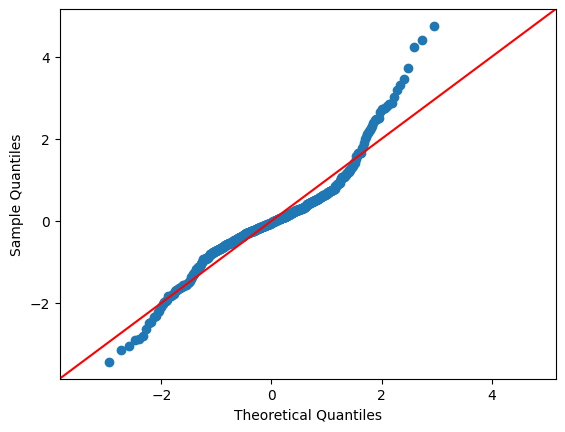

In [52]:
# QQ Plot - Showing that residuals/actual data are normally distributed
res = y_test - y_pred
sm.qqplot(res, fit=True, line="45") ;

The below graph shows that the errors have constant variance, with the residuals scattered randomly around zero.

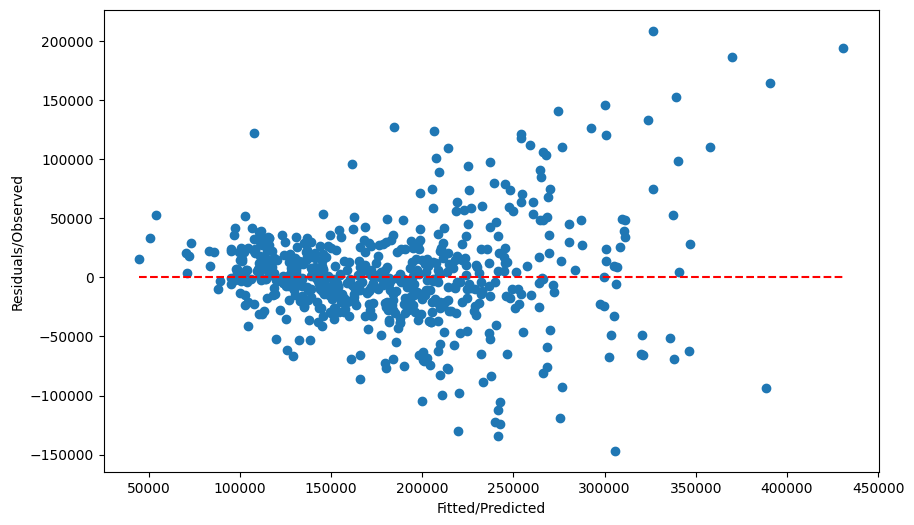

In [53]:
# Residuals vs Fitted (Predicted) Values - Constant variance
plt.figure(figsize = (10,6))
plt.scatter(y_pred, res)
plt.xlabel("Fitted/Predicted")
plt.ylabel("Residuals/Observed")
plt.hlines(0, min(y_pred), max(y_pred), colors = 'red', linestyles = 'dashed') ;

Residual is the observed data vs. the fitted or predicted.  This graph below shows what the observed data was over time for the cross validation.

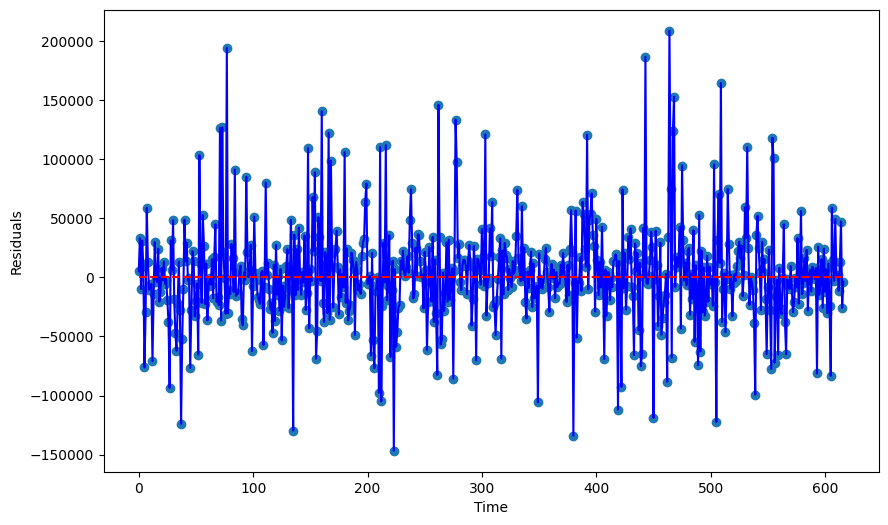

In [54]:
# Residuals vs Time - to show independence of residuals
plt.figure(figsize = (10,6))
plt.scatter(range(len(res)), res)
plt.plot(range(len(res)), res, 'b')
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.hlines(0, min(range(len(res))), max(range(len(res))), colors = 'red', linestyles = 'dashed') ;

##Lasso

Regularization.  We perform the Lasso without the feature selection through correlation.

In [55]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


In [56]:
scaler = StandardScaler()

In [57]:
# scale the features using the StandardScaler ( Z-score )
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=4)

In [58]:
# %%capture --no-stdout
X_lasso = train.drop('SalePrice', axis = 1)
y_lasso = train['SalePrice']
X_lasso;

In [59]:
X_lasso = pd.DataFrame(scaler.fit_transform(X_lasso), columns=X_lasso.columns)
X_lasso;

In [60]:
# Specify values of alpha we want to try
alph = [1e-3, 1e-2, 1e-1, 1, 2, 3, 5, 7, 10, 20]

# Create empty list to hold results
results_alpha = []

for i in alph:
  # Train the model
  my_fit_lasso = Lasso(alpha = i, tol = .01, max_iter=10000); # Looping through alpha

  # Calculate CV RMSE
  n = 200
  results = np.zeros(n)
  for idx in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X_lasso, y_lasso, test_size=0.25)
    my_fit_lasso.fit(X_train, y_train)
    y_pred = my_fit_lasso.predict(X_test)
    results[idx] = np.sqrt(mean_squared_error(y_test,y_pred))

  results_alpha.append(results.mean())

results_df = pd.DataFrame({'Alpha': alph, 'RMSE': results_alpha});

In [61]:
results_df.sort_values( by = 'RMSE' )

,Alpha,RMSE
9,20.000,38748.541263
5,3.000,39166.925040
7,7.000,39225.839609
1,0.010,39264.229958
2,0.100,39265.082591
4,2.000,39471.492536
3,1.000,39554.060221
0,0.001,39730.440893
6,5.000,40099.345332
8,10.000,40232.324548


In [62]:
# %%capture --no-stdout
# Perform CV
n = 500
results = np.zeros(n)
for idx in range(n):
  X_train, X_test, y_train, y_test = train_test_split(X_lasso, y_lasso, test_size=0.25)
  model = Lasso(alpha = 20, tol = .01, max_iter=10000)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  results[idx] = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"CV RMSE: {results.mean().round(2)}")
print(f"Number of Predictors: {sum(model.coef_ >0)}")

CV RMSE: 39663.21
Number of Predictors: 16


In [63]:
X_lasso.shape

(2466, 24)

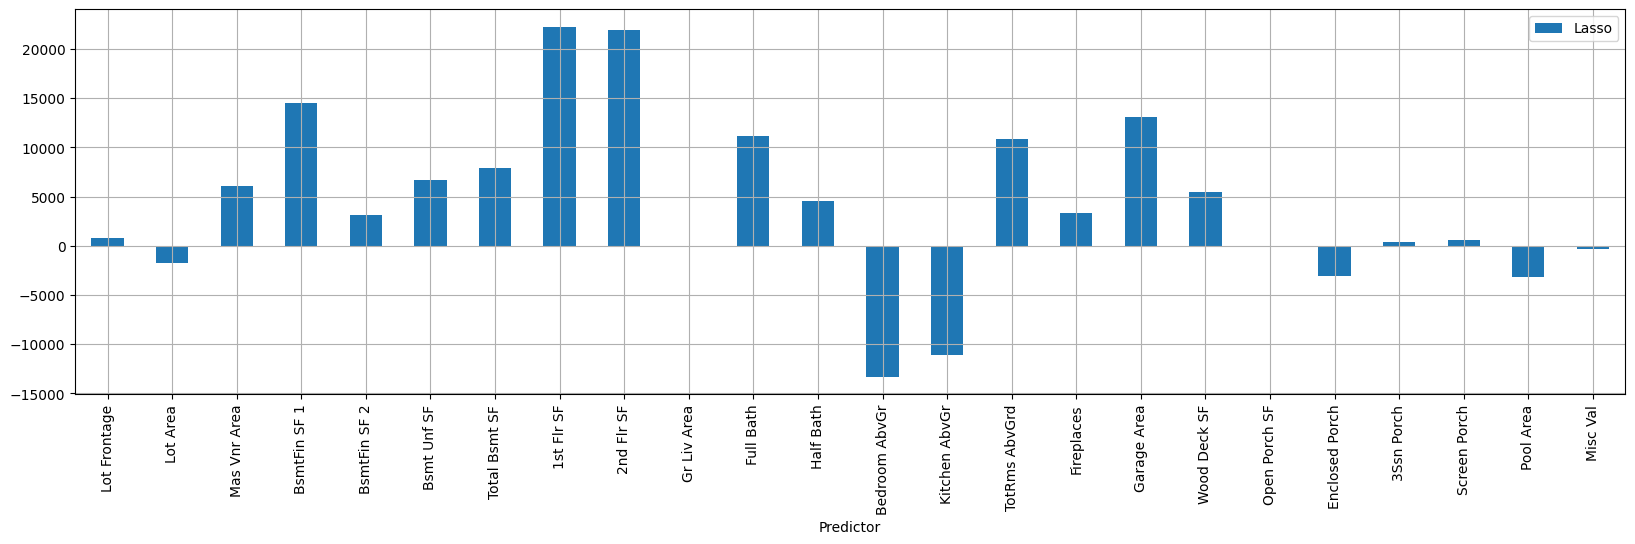

In [64]:
# Plot model coefficients
model_results = pd.DataFrame()
model_results['Predictor'] = X_lasso.columns
model_results['Lasso'] = model.coef_
model_results.plot(
    x = 'Predictor',
    kind = 'bar',
    figsize = (20,5)
    )
plt.grid()

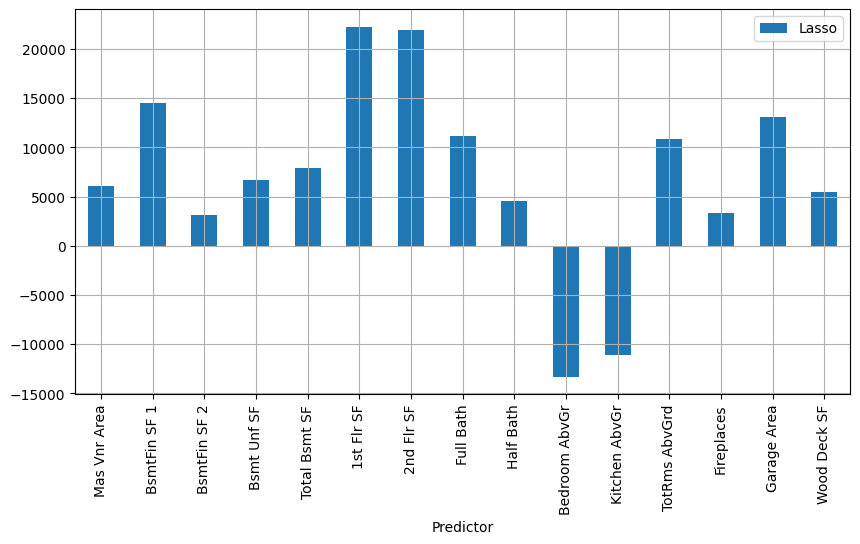

In [65]:
# Plot parameters with coefficients greater than 0
greater_0 = model_results[(model_results['Lasso'] > 1000 ) | (model_results['Lasso'] < -5000 )]
greater_0.plot(x = 'Predictor', kind = 'bar', figsize = (10,5))
plt.grid()

#Communicate the Results

In [66]:
y_test;

In [67]:
y_pred;

In [68]:
def rmspe(y_true, y_pred):
    return np.sqrt(np.nanmean(np.square(((y_true - y_pred) / y_true))))*100


In [69]:
rmspe(y_test, y_pred)

28.221174699534103

My highest RMSE: 49355.450436903404 with CV RMSE: 51005.7733851371 with Number of Predictors: 11.
I played around with the features after that.  Adding all the integers and dropping alot of columns that had been categorized as floats but were not truly (such as year built, month sold, garage cars, Yr sold, PID, MS Subclass, etc).  Doing so, I was able to bring my RMSE down by around 9_000.  
My lowest was CV RMSE: 39367.98
Number of Predictors: 24

The regression assumptions are: linear relationship, independent residuals, constant variance of residuals, no collinearity, residuals are normally distributed.

By doing the above changes, my heat map also changed from interspersed green spots into a more linear and clear green line which showed less collinearity/independence between features.  

Here is a link to the powerpoint presentation required for class:  https://www.canva.com/design/DAGIoAA2jlQ/umIhwV8hUtLTyPSEWDfH8A/view?utm_content=DAGIoAA2jlQ&utm_campaign=designshare&utm_medium=link&utm_source=editor